<a href="https://colab.research.google.com/github/Jucavilav/CienciaDatosParcialDatos/blob/main/JuanAvila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pylev

In [4]:
import re
from random import randint
from seaborn import load_dataset
from datetime import datetime
from difflib import SequenceMatcher
import numpy as np
import pandas as pd
import pylev

In [5]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [6]:
pd.set_option("display.max_columns", None)

In [7]:
stores_df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/stores.csv")
sales_df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

<ipython-input-7-dc016f99d3ba>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


In [9]:
stores_df.shape
sales_df.shape

(373855, 9)

### ¿Qué tanto varían las ventas dependiendo del mes o del día de la semana?

In [10]:
sales_df.sample(5)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
189506,742,7,2014-06-15,0,0,0,0,0,0
371511,1002,5,2014-01-03,4536,624,1,0,0,1
125863,689,2,2014-08-19,7906,753,1,1,0,1
232210,1076,4,2014-05-08,3826,608,1,1,0,0
276525,791,6,2014-03-29,6075,676,1,0,0,0


In [11]:
sales_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [13]:
# Seleccionar Columnas Deseadas
colum_deseadas = ["Store", "DayOfWeek", "Date", "Sales", "Customers"]

# Ahora, selecciona las columnas deseadas
df_sales = sales_df [colum_deseadas]

In [14]:
df_sales.head (5)

,Store,DayOfWeek,Date,Sales,Customers
0,1,3,2014-12-31,2605,327
1,2,3,2014-12-31,2269,252
2,3,3,2014-12-31,3804,408
3,4,3,2014-12-31,10152,1311
4,5,3,2014-12-31,1830,217


In [15]:
features = ["Sales", "Customers"]

<ipython-input-25-dd88ca2fd40c>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


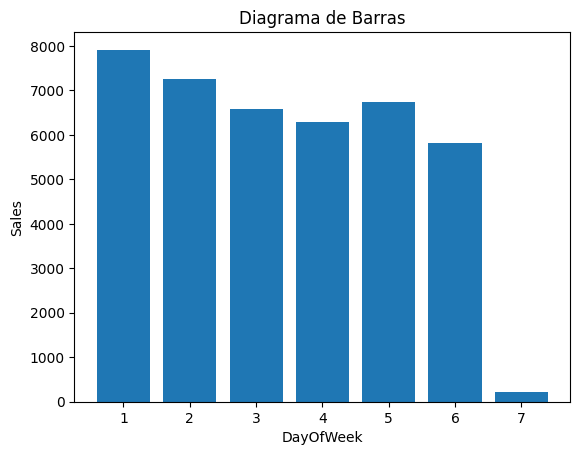

In [25]:
# Leer la base de datos
df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

# Variables
variable_numerica = "Sales"
variable_categorica = "DayOfWeek"

# Agrupar y calcular la media de la variable numérica por categoría
agrupado = df.groupby(variable_categorica)[variable_numerica].mean()

# Crear el diagrama de barras
plt.bar(agrupado.index, agrupado.values)
plt.xlabel(variable_categorica)
plt.ylabel(variable_numerica)
plt.title("Diagrama de Barras")
plt.show()

<ipython-input-27-3567c67e9435>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


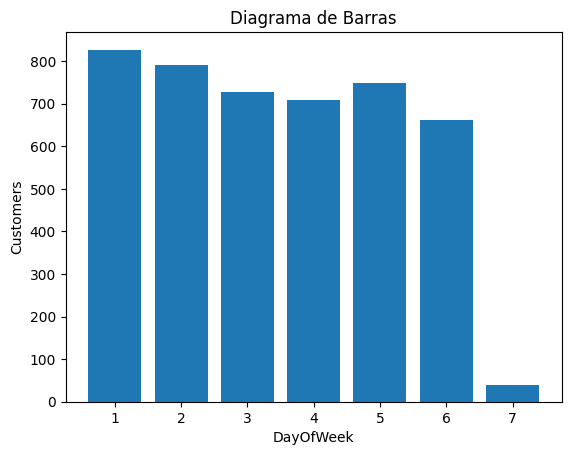

In [27]:
# Leer la base de datos
df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

# Variables
variable_numerica = "Customers"
variable_categorica = "DayOfWeek"

# Agrupar y calcular la media de la variable numérica por categoría
agrupado = df.groupby(variable_categorica)[variable_numerica].mean()

# Crear el diagrama de barras
plt.bar(agrupado.index, agrupado.values)
plt.xlabel(variable_categorica)
plt.ylabel(variable_numerica)
plt.title("Diagrama de Barras")
plt.show()

Hay mayor afluencia y ventas y clientes las semanas 1, 2 y 5

### ¿Como del nivel de surtido de la sucursal?

In [73]:
import pandas as pd

# Cargar los dos DataFrames desde los archivos CSV
data1 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/stores.csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

# Columnas de interés en data1 y data2
columna_busqueda = 'Store'
columna_resultado = 'Store'

# Valor que deseas buscar en data2
valor_a_buscar = 'Store'

# Realizar la operación tipo BUSCARV
resultado = data1[data1[columna_busqueda].isin(data2[data2['Store'] == valor_a_buscar])][[columna_busqueda, columna_resultado]]

# Mostrar el resultado
print(resultado)

Empty DataFrame
Columns: [Store, Store]
Index: []


<ipython-input-73-8f0068f82a54>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


In [75]:
import pandas as pd

# Cargar los dos DataFrames desde los archivos CSV
data1 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/stores.csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

# Realizar un cruce (merge) en función de la columna en común
resultado = pd.merge(data1, data2, on='Store', how='inner')

# Mostrar el resultado
print(resultado)

        Store StoreType Assortment  CompetitionDistance  \
0           1         c          a               1270.0   
1           1         c          a               1270.0   
2           1         c          a               1270.0   
3           1         c          a               1270.0   
4           1         c          a               1270.0   
...       ...       ...        ...                  ...   
373850   1115         d          c               5350.0   
373851   1115         d          c               5350.0   
373852   1115         d          c               5350.0   
373853   1115         d          c               5350.0   
373854   1115         d          c               5350.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                             9.0                    2008.0       0   
1                             9.0                    2008.0       0   
2                             9.0                    2008.0       0   
3      

<ipython-input-75-481fb63e4245>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


In [76]:
resultado.head (5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2014-12-31,2605,327,1,0,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2014-12-30,6466,703,1,0,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2014-12-29,6463,700,1,0,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2014-12-28,0,0,0,0,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,6,2014-12-27,6057,684,1,0,0,1


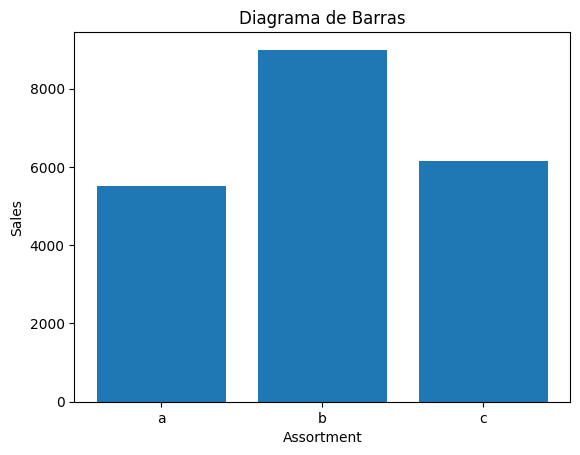

In [77]:
# Leer la base de datos
df = resultado

# Variables
variable_numerica = "Sales"
variable_categorica = "Assortment"

# Agrupar y calcular la media de la variable numérica por categoría
agrupado = df.groupby(variable_categorica)[variable_numerica].mean()

# Crear el diagrama de barras
plt.bar(agrupado.index, agrupado.values)
plt.xlabel(variable_categorica)
plt.ylabel(variable_numerica)
plt.title("Diagrama de Barras")
plt.show()

En donde hay mayor surtido son en las sucursales b, seguido de las c y por ultimo las a

### Adjunte un diagrama de bloques que evidencie los diferentes procesos de limpieza y preparación implementados

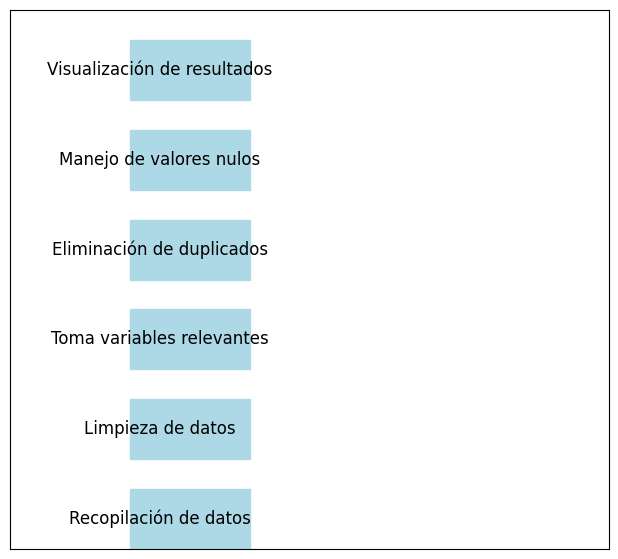

In [63]:
import matplotlib.pyplot as plt

# Define los procesos de limpieza y preparación de datos
procesos = [
    "Recopilación de datos",
    "Limpieza de datos",
    "Toma variables relevantes",
    "Eliminación de duplicados", #si aplica
    "Manejo de valores nulos", #si aplica
    "Visualización de resultados",
]

# Crea una figura y ejes
fig, ax = plt.subplots(figsize=(10, 7))

# Dibuja los bloques de proceso
block_width = 2
block_height = 1
for i, proceso in enumerate(procesos):
    x = 2
    y = i * (block_height + 0.5)
    ax.add_patch(plt.Rectangle((x, y), block_width, block_height, fill=True, color='lightblue'))
    plt.text(x + 0.5, y + 0.5, proceso, fontsize=12, va='center', ha='center')

# Configura la apariencia de la figura
ax.set_xlim(0, 10)
ax.set_ylim(0, len(procesos) * (block_height + 0.5))
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Muestra el diagrama de bloques
plt.show()

modelo de Regresion lineal

In [147]:
df = resultado

In [148]:
df.head (5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2014-12-31,2605,327,1,0,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2014-12-30,6466,703,1,0,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2014-12-29,6463,700,1,0,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2014-12-28,0,0,0,0,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,6,2014-12-27,6057,684,1,0,0,1


In [149]:
# Elimina los valores duplicados basados en una columna store
df = df.drop_duplicates(subset=['Store'])

In [150]:
df.shape #Tabla sin valores duplicados

(1115, 18)

Top 5 de los indicadores que considera más importantes para el ejercicio de regresión propuesto:

- CompetitionDistance
- Sales
- Customers
- Store                          

In [151]:
#Contar los null
df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
DayOfWeek                      0
Date                           0
Sales                          0
Customers                      0
Open                           0
Promo                          0
StateHoliday                   0
SchoolHoliday                  0
dtype: int64

In [152]:
# Seleccionar Columnas Deseadas
columnas_deseadas = ["Store", "CompetitionDistance", "Sales", "Customers", "Promo2"]

In [153]:
# Ahora, selecciona las columnas deseadas
df_seleccionado = df [columnas_deseadas]

In [154]:
df_seleccionado.shape

(1115, 5)

In [155]:
df_seleccionado.head (5)

,Store,CompetitionDistance,Sales,Customers,Promo2
0,1,1270.0,2605,327,0
365,2,570.0,2269,252,1
730,3,14130.0,3804,408,1
1095,4,620.0,10152,1311,0
1460,5,29910.0,1830,217,0


In [156]:
# Eliminar los valores nulos de las columnas
columnas_a_verificar = ["Store", "CompetitionDistance", "Sales", "Customers", "Promo2"]
df_seleccionado = df_seleccionado.dropna(subset=columnas_a_verificar)

In [157]:
# Se eliminan los 8 valores nulos
df_seleccionado.shape

(1112, 5)

In [158]:
features = ["CompetitionDistance", "Customers", "Promo2"]

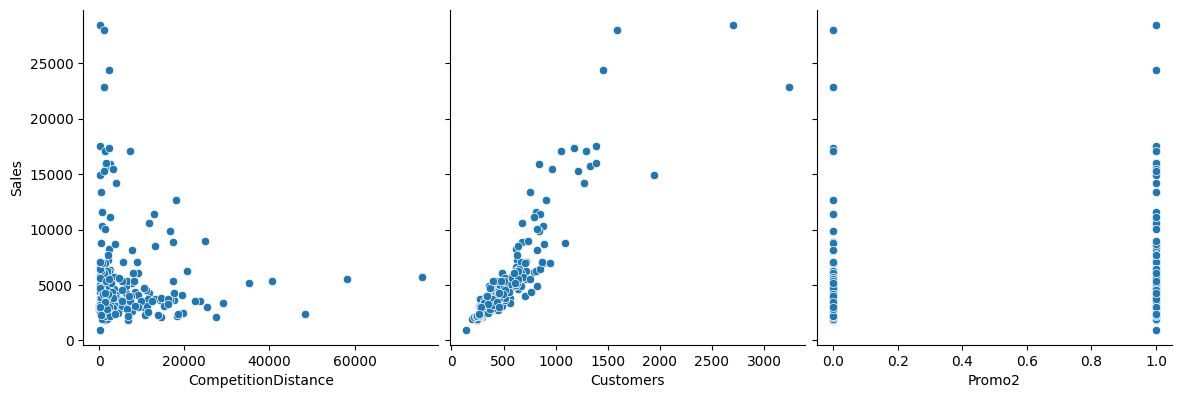

In [159]:
sns.pairplot(df_seleccionado.sample(frac=0.2 ), height=4, y_vars="Sales", x_vars=features, kind="scatter")
#sns.pairplot(crabs_df.sample(frac=0.2), height=4, y_vars="Age", x_vars=features, kind="scatter")

<Axes: >

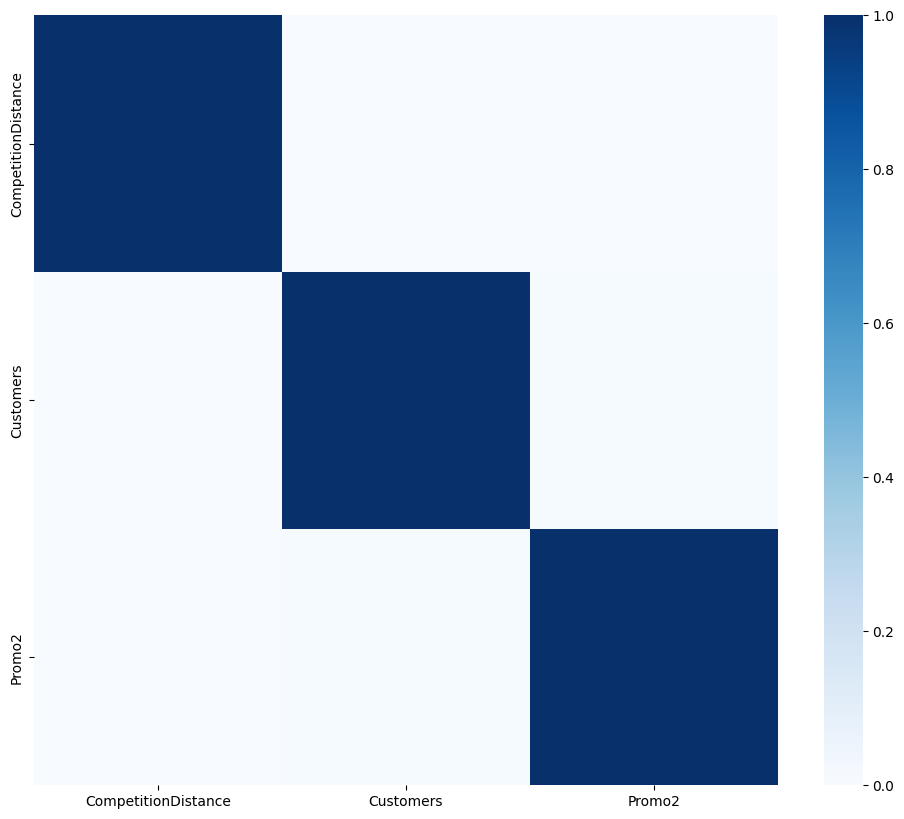

In [160]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_seleccionado[features].corr(), cmap="Blues", vmin=0, vmax=1)

[]

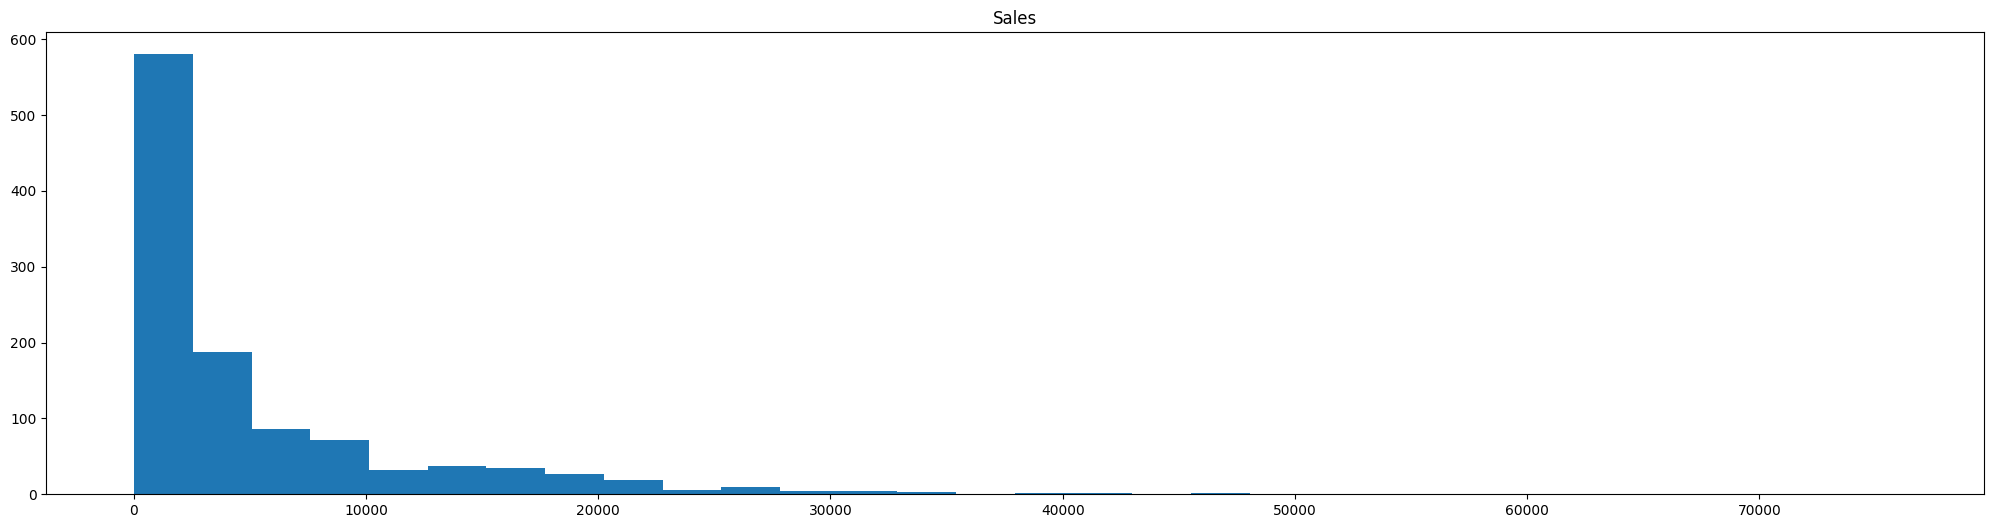

In [161]:
# Histograma.
plt.figure(figsize=(25, 6))
plt.hist(df_seleccionado["CompetitionDistance"], bins=30)
plt.title("Sales")
plt.plot()

[]

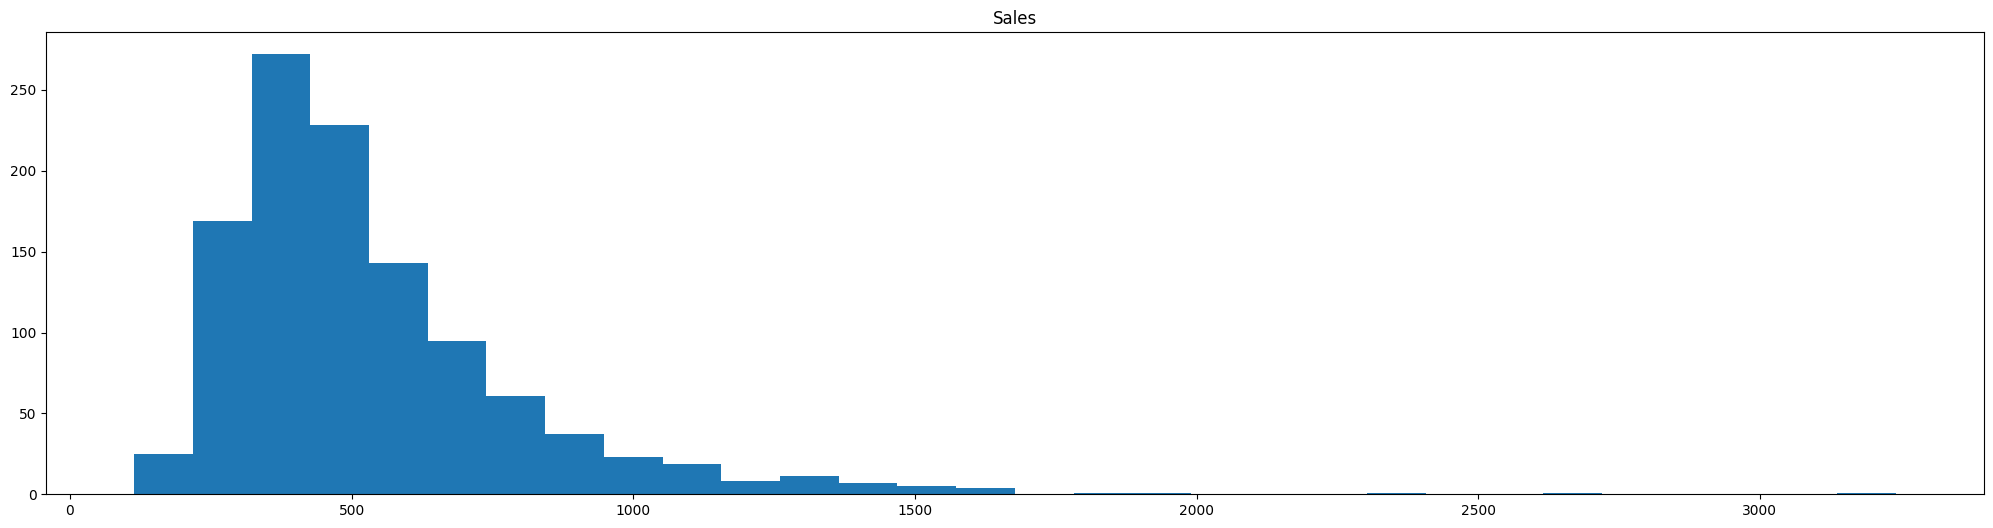

In [162]:
# Histograma.
plt.figure(figsize=(25, 6))
plt.hist(df_seleccionado["Customers"], bins=30)
plt.title("Sales")
plt.plot()

Preparacion de los datos

In [163]:
total_rows = df_seleccionado.shape[0]
total_rows

1112

In [164]:
df_seleccionado.loc[df_seleccionado.duplicated(subset=features, keep=False)].head(3)

,Store,CompetitionDistance,Sales,Customers,Promo2


In [165]:
duplicated_rows = df_seleccionado.loc[df_seleccionado.duplicated(subset=features, keep=False)].shape[0]
duplicated_rows
print(f"Duplicates: {(duplicated_rows/total_rows)*100:.4f}%")

Duplicates: 0.0000%


Particionamiento del conjunto de datos en entrenamiento y prueba

Se dividira el DF dos partes:
- Entrenamiento 70%
- Prueba. 30%

In [166]:
X_train, X_test, y_train, y_test = train_test_split(df_seleccionado[features], df_seleccionado["Sales"], test_size=0.3, random_state=1)

In [167]:
X_train.shape, y_train.shape

((778, 3), (778,))

In [168]:
X_test.shape, y_test.shape

((334, 3), (334,))

In [169]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Interpretación de los coeficientes y del intercepto

In [170]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

,columns,coef
0,CompetitionDistance,0.032352
1,Customers,10.027610
2,Promo2,1099.850167


In [172]:
regression.intercept_

-935.8113214375908

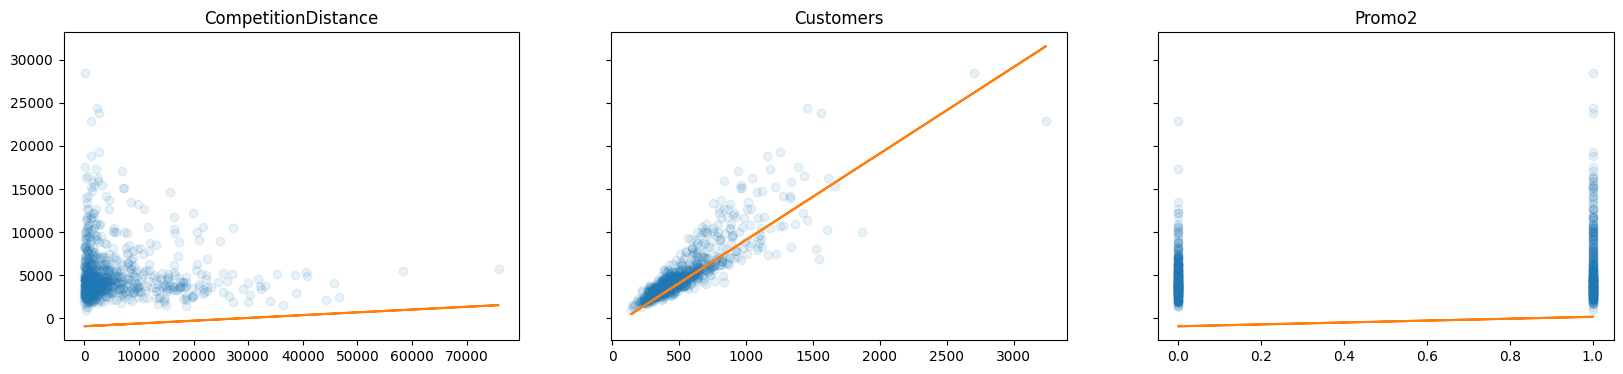

In [173]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [174]:
# Siendo el incremento de apenas 1/10 de unidad, se espera un cambio en la estimación de la variable objetivo de ~0.57%
df = pd.concat([df_seleccionado[features].iloc[0:1]] * 5).reset_index()
df["Customers"] = df["Customers"] + (df.index / 10)
df["prediction"] = regression.predict(df[features])
df["% change"] = df["prediction"].diff()
df

,index,CompetitionDistance,Customers,Promo2,prediction,% change
0,0,1270.0,327.0,0,2384.304184,NaN
1,0,1270.0,327.1,0,2385.306945,1.002761
2,0,1270.0,327.2,0,2386.309706,1.002761
3,0,1270.0,327.3,0,2387.312467,1.002761
4,0,1270.0,327.4,0,2388.315228,1.002761


Mean Absolute Error (MAE)

In [175]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 969.2227184389974
Test: 1057.26587467812


Root Mean Squeared Error (RMSE)

In [176]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 1544.9889923191915
Test: 1660.7836649530195


Análisis del error

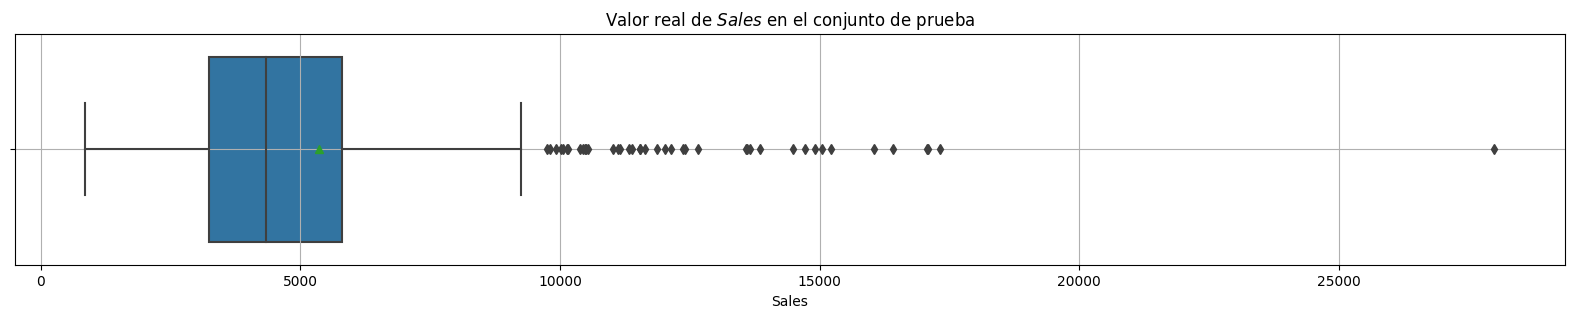

In [177]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{Sales}$ en el conjunto de prueba")
plt.grid()
plt.show()

In [178]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count      334.000000
mean      5359.000000
std       3411.206376
min        856.000000
25%       3236.250000
50%       4327.500000
75%       5792.500000
99%      16858.180000
max      27994.000000
Name: Sales, dtype: float64

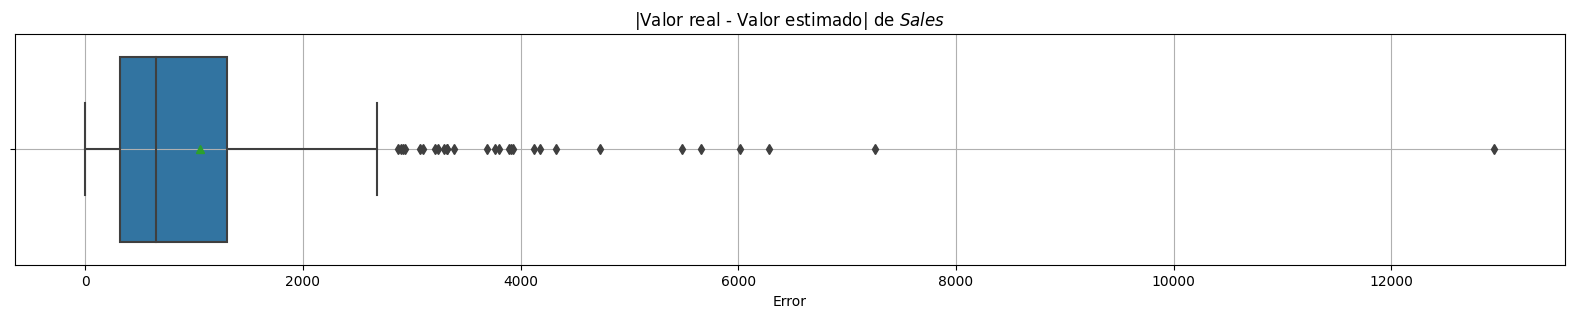

In [179]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{Sales}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [180]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count      334.000000
mean      1057.265875
std       1282.699245
min          0.781562
25%        319.947193
50%        654.194129
75%       1302.351513
95%       3345.881456
99%       5898.375017
max      12947.088404
Name: Sales, dtype: float64

2do Modelo

In [181]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [182]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [183]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,CompetitionDistance,264.583078
1,Customers,2851.191019
2,Promo2,549.743346


In [184]:
pipeline["model"].intercept_

5193.573264781491

In [185]:
y_train.mean(), y_test.mean()

(5193.573264781491, 5359.0)

In [186]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 969.2227184389973
Test: 1057.26587467812

RMSE:
Train: 1544.9889923191915
Test: 1660.7836649530193


<Axes: >

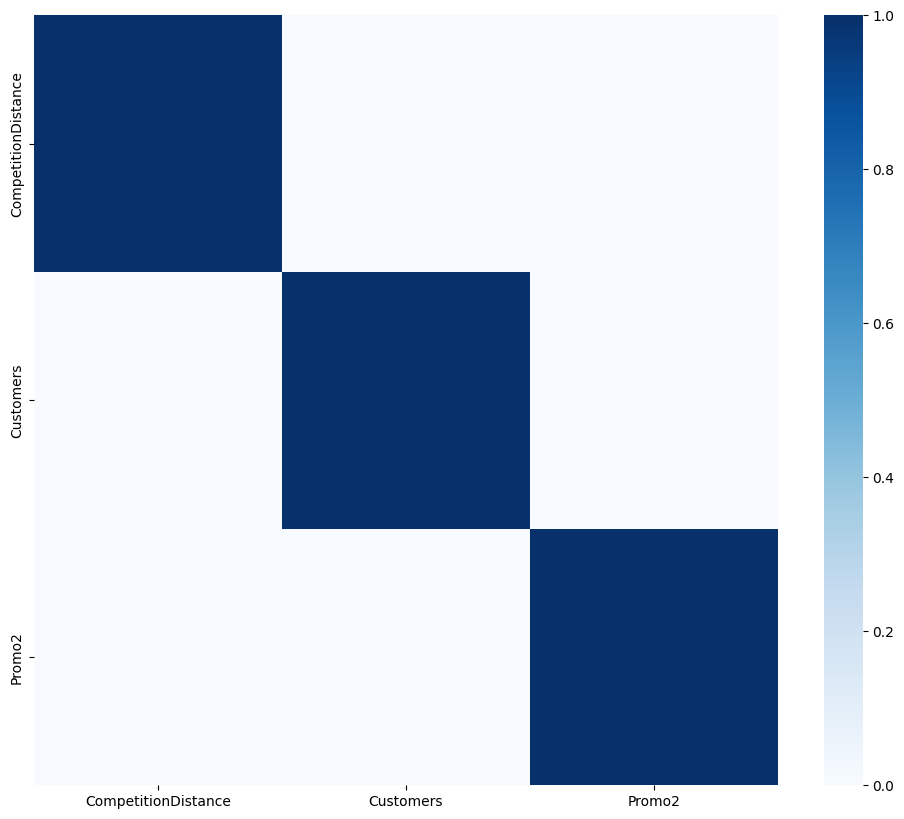

In [187]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [188]:
X_train.corr()

,CompetitionDistance,Customers,Promo2
CompetitionDistance,1.000000,-0.156089,-0.159262
Customers,-0.156089,1.000000,0.003036
Promo2,-0.159262,0.003036,1.000000


In [189]:
features2 = ["CompetitionDistance", "Customers", "Promo2"]

In [190]:
X_train[features2].corr()

,CompetitionDistance,Customers,Promo2
CompetitionDistance,1.000000,-0.156089,-0.159262
Customers,-0.156089,1.000000,0.003036
Promo2,-0.159262,0.003036,1.000000


In [191]:
pipeline.fit(X_train[features2], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [192]:
pipeline["model"].intercept_

5193.573264781491

In [193]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features2])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features2])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features2]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features2]))))

MAE:
Train: 969.2227184389973
Test: 1057.26587467812

RMSE:
Train: 1544.9889923191915
Test: 1660.7836649530193


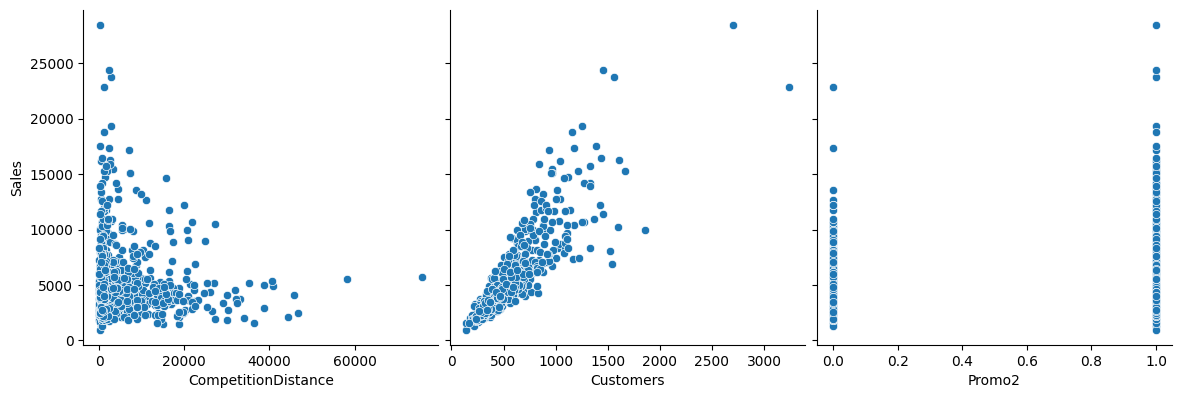

In [194]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="Sales", x_vars=features2, kind="scatter")

In [195]:
pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [196]:
pipeline.fit(X_train[features2], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [197]:
pd.DataFrame({"columns": pipeline["poly"].get_feature_names_out(), "coef": pipeline["model"].coef_})

,columns,coef
0,CompetitionDistance,9.508838e+00
1,Customers,2.545818e+03
2,Promo2,-4.994520e+16
3,CompetitionDistance^2,-8.417879e+02
4,CompetitionDistance Customers,1.021819e+03
5,CompetitionDistance Promo2,5.112054e+01
6,Customers^2,-6.750729e+02
7,Customers Promo2,1.656509e+03
8,Promo2^2,4.994520e+16


In [198]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features2])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features2])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features2]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features2]))))

MAE:
Train: 860.3862854413215
Test: 923.5407464388206

RMSE:
Train: 1373.968276940562
Test: 1570.956363760642


Revisando los resultados, se puede observar:

1. la distancia de la competencia no es un factor que produzca mayor o menor cantidad de ventas, dado como muestra el grafico.
2. A mayor cantidad de clientes, mayor cantidad de ventas, se debe buscar atraer mayor cantidad de clientes a cada tienda.
3. Tienda que tenga activa promocion permanente produce mas cantidad de ventas.

### ¿Cuál es el impacto promedio en la ventas de una sucursal si se decide establecer una promoción y adicionalmente si dicha promoción se aplica un fin de semana?


In [200]:
b = df_seleccionado

In [201]:
b.head(5)

,Store,CompetitionDistance,Sales,Customers,Promo2
0,1,1270.0,2605,327,0
365,2,570.0,2269,252,1
730,3,14130.0,3804,408,1
1095,4,620.0,10152,1311,0
1460,5,29910.0,1830,217,0


In [209]:
# Filtrar las filas correspondientes a Juan y Carlos
filtro = b['Promo2'].isin([1, 0])

# Calcular el promedio de ventas de Juan y Carlos
promedio_ventas = b[filtro].groupby('Promo2')['Sales'].mean()

# Mostrar el resultado
print("Promedio de Ventas si se quiere establecer una promocion: 0 = sin promocion 1 = con promocion", promedio_ventas)

Promedio de Ventas si se quiere establecer una promocion: 0 = sin promocion 1 = con promocion Promo2
0    4717.429889
1    5743.261404
Name: Sales, dtype: float64
